Распределяем файлы для подготовки данных

In [49]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# train_df = pd.read_csv('train_edit.csv')
# valid_df = pd.read_csv('valid_edit.csv')
train_df = pd.read_csv("../AC/trein.csv")
valid_df = pd.read_csv("../AC/val.csv")

In [50]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

В этот раз я использую модель XGBoost для классификации.

In [51]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.1,
    'random_state': 34
}

In [52]:
model = xgb.train(params, dtrain, num_boost_round=100)

Предсказываем верояность

In [53]:
y_prob = model.predict(dval)

fpr, tpr, trashers = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

Построение ROC-кривой

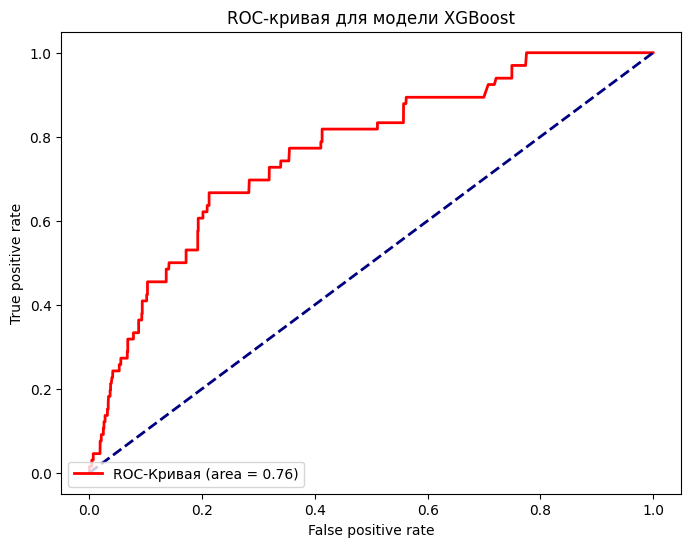

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower left')
plt.show()